# Classifying Models

In [ ]:
import pandas as pd

import io
import networkx as nx

Read in player history Dataframe and group by columns

In [147]:
df2 = pd.read_csv('PlayersCombFixed.csv')
df2 = df2.drop(columns=['Unnamed: 0'])


C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\499089713.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('PlayersCombFixed.csv')


In [148]:
df2['Country'] = df2['Country'].str.split(' ').str[1]
df2["Comp"] = df2["Comp"] + [" "] + df2["Country"]


### Group nodes together

In [ ]:
df3 = df2.groupby(['ID']).agg({
                                'Season':lambda x: list(x),
                                'Name': 'first',
                                'Squad': lambda x: list(x),
                                'Comp': lambda x: list(x),
                                'LgRank' : lambda x: list(x),
                                'CountryFixed': 'first',
                                'DOB' : 'first',
                                'MP' : 'sum',
                                'Gls' : 'sum',
                                         }).reset_index()
df3

Data quality issue

In [150]:
for (i, row) in df3.iterrows():
    if(df3.at[i, 'DOB'] == "na Na"):
        print(df3.at[i, 'Name'])
        df3.at[i, 'DOB'] = 1990

Ionut-Andrei-Radu


List of all leagues

In [151]:
allLeagues = ['1. La Liga ESP', '2. Serie B ITA', '1. Serie A ITA',
       '1. Tippeligaen NOR', '1. Bundesliga GER', '3. 3. Liga GER',
       '1. Eliteserien NOR', '1. Division 1 FRA', '1. Ligue 1 FRA',
       '2. 2. Bundesliga GER', '1. Swiss Super League SUI',
       '2. Championship ENG', '1. Premier League ENG',
       '2. Segunda División ESP', '1. Super League GRE',
       '1. Primeira Liga POR', '1. Süper Lig TUR', '1. Pro League KSA',
       '2. Ligue 2 FRA', '1. Primera Div ARG', '1. Premier League SCO',
       'Jr. PL2 — Div. 2 ENG', '2. Championship SCO',
       '1. Premiership SCO', '1. Primera Div PAR', '1. Série A BRA',
       '1. First Division A BEL', '1. Eredivisie NED', '1. Superliga DEN',
       '1. Primera A COL', '1. MLS USA', '1. Super League CHN',
       '2. First Division ENG', '3. League One ENG',
       '1. First Division BEL', '1. Pro League BEL', '1. Liga I ROU',
       '1. Premier League RUS', '1. 1. HNL CRO',
       '1. Primera División MEX', '1. Primera División URU',
       '1. Liga MX MEX', '1. First League CZE', '3. USL USA',
       '2. NASL USA', '4. League Two ENG', '1. Premier League UKR',
       '1. Super League IND', '1. NB I HUN', '1. Veikkausliiga FIN',
       '2. USL Champ USA', '1. SuperLiga SRB', '1. A-League AUS',
       '1. Liga FUTVE VEN', '2. Série B BRA', '1. Top Division RUS',
       '1. Alpha Ethniki GRE', '1. I Liga POL', '1. Ekstraklasa POL',
       '1. Allsvenskan SWE', '2. Superettan SWE', '1. J1 League JPN',
       '1. Top League UKR', '1. Bundesliga AUT',
       '1. Primera División BOL', '2. Second Division BEL',
       '3. Second Division ENG', 'Jr. PL2 — Div. 1 ENG',
       '1. Super Lg SUI', '1. A Group BUL', '4. Third Division ENG',
       '2. J2 League JPN', '1. Primera División CHI',
       '5. Conf National ENG', '2. First Division B BEL',
       '2. Eerste Divisie NED', '1. First League BUL',
       '1. J.League Division 1 JPN', '1. K League KOR', '2. USL USA',
       '1. Liga Profesional BOL', '1. I-League IND', '1. Pro League IRN',
       '1. Descentralizado PER', '1. Liga 1 PER',
       '1. Premier Division RSA', '2. First Division SCO',
       '5. National League ENG', '1. Serie A ECU', '5. Conf Premier ENG',
       '1. CanPL CAN', '3. USL League One USA', '3. USL Pro USA',
       'Jr. U19 Bundesliga GER', 'Jr. U17 Bundesliga GER']

Add a columns for seasons played in all leagues

In [152]:
i = 0
for l in allLeagues:
    borb = []
    for row in df3['Comp']:
        borb.append(row.count(l))
            
    print(l, borb[10])
    df3[allLeagues[i]] = borb
    i += 1

1. La Liga ESP 0
2. Serie B ITA 0
1. Serie A ITA 0
1. Tippeligaen NOR 1
1. Bundesliga GER 0
3. 3. Liga GER 0
1. Eliteserien NOR 0
1. Division 1 FRA 0
1. Ligue 1 FRA 1
2. 2. Bundesliga GER 0
1. Swiss Super League SUI 0
2. Championship ENG 0
1. Premier League ENG 0
2. Segunda División ESP 0
1. Super League GRE 0
1. Primeira Liga POR 0
1. Süper Lig TUR 0
1. Pro League KSA 1
2. Ligue 2 FRA 0
1. Primera Div ARG 0
1. Premier League SCO 0
Jr. PL2 — Div. 2 ENG 0
2. Championship SCO 0
1. Premiership SCO 0
1. Primera Div PAR 0
1. Série A BRA 0
1. First Division A BEL 2
1. Eredivisie NED 1
1. Superliga DEN 0
1. Primera A COL 0
1. MLS USA 0
1. Super League CHN 0
2. First Division ENG 0
3. League One ENG 0
1. First Division BEL 1
1. Pro League BEL 5
1. Liga I ROU 0
1. Premier League RUS 0
1. 1. HNL CRO 0
1. Primera División MEX 0
1. Primera División URU 0
1. Liga MX MEX 0
1. First League CZE 0
3. USL USA 0
2. NASL USA 0
4. League Two ENG 0
1. Premier League UKR 0
1. Super League IND 0
1. NB I HUN 1

first place column

In [153]:
borb = []
for row in df3['LgRank']:
    borb.append(row.count('1st'))
            
    # print(l, borb[10])
df3['first place'] = borb

get column counts

In [154]:
nodes = df2.groupby("ID").agg({
                                "Season": pd.Series.nunique,
                                "Squad": pd.Series.nunique,
                                "Comp": pd.Series.nunique,  
                                })

nodes = nodes.reset_index()
# nodes['Name'] = nodes.index
nodes

,ID,Season,Squad,Comp
0,0000acda,11,6,1
1,000b3da6,10,9,6
2,001a63e0,7,4,3
3,00242715,9,4,4
4,00242b75,7,3,3
...,...,...,...,...
9695,ffd69308,8,6,2
9696,ffec9769,10,7,5
9697,ffed43e3,9,10,6
9698,fff10a46,13,8,3


In [155]:
nodes.rename(columns={'Season': 'numofSeasons', 'Squad': 'numofSquads', 'Comp':'numofComp'}, inplace=True)

merge dataframes

In [156]:
df4 = pd.merge(df3, nodes, on='ID', how='outer')
df4

,ID,Season,Name,Squad,Comp,LgRank,CountryFixed,DOB,MP,Gls,...,5. Conf Premier ENG,1. CanPL CAN,3. USL League One USA,3. USL Pro USA,Jr. U19 Bundesliga GER,Jr. U17 Bundesliga GER,first place,numofSeasons,numofSquads,numofComp
0,0000acda,"[2012-2013, 2013-2014, 2014-2015, 2015-2016, 2...",Marco-Benassi,"[Inter, Livorno, Torino, Torino, Torino, Fiore...","[1. Serie A ITA, 1. Serie A ITA, 1. Serie A IT...","[9th, 20th, 9th, 12th, 9th, 8th, 16th, 10th, 1...",Italy,1994,216,26.0,...,0,0,0,0,0,0,0,11,6,1
1,000b3da6,"[2010-2011, 2011-2012, 2012-2013, 2013-2014, 2...",Manuel-Iturra,"[União de Leiria, Real Murcia, Málaga, Granada...","[1. Primeira Liga POR, 2. Segunda División ESP...","[10th, 18th, 6th, 15th, 17th, 17th, 18th, 8th,...",Chile,1984,234,2.0,...,0,0,0,0,0,0,0,10,9,6
2,001a63e0,"[2010-2011, 2012-2013, 2013-2014, 2014-2015, 2...",Ozkan-Yildirim,"[Wrd Bremen II, Werder Bremen, Werder Bremen, ...","[3. 3. Liga GER, 1. Bundesliga GER, 1. Bundesl...","[18th, 14th, 12th, 10th, 13th, 17th, 11th, 17th]",Germany,1993,58,4.0,...,0,0,0,0,0,0,0,7,4,3
3,00242715,"[2014-2015, 2015-2016, 2016-2017, 2017-2018, 2...",Moussa-Niakhate,"[Valenciennes, Valenciennes, Valenciennes, Met...","[2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...","[16th, 12th, 13th, 20th, 12th, 13th, 12th, 8th...",France,1996,237,10.0,...,0,0,0,0,0,0,0,9,4,4
4,00242b75,"[2016-2017, 2016-2017, 2017-2018, 2018-2019, 2...",Leandro-Barreiro-Martins,"[Mainz U17, Mainz U19, Mainz U19, Mainz U19, M...","[Jr. U17 Bundesliga GER, Jr. U19 Bundesliga GE...","[10th, 10th, 16th, 9th, 12th, 13th, 12th, 8th,...",Luxembourg,2000,150,14.0,...,0,0,0,0,3,1,0,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,ffd69308,"[2011-2012, 2012-2013, 2013-2014, 2014-2015, 2...",Javi-Alamo,"[Recreativo, Zaragoza, Zaragoza, Zaragoza, Gir...","[2. Segunda División ESP, 1. La Liga ESP, 2. S...","[17th, 20th, 14th, 6th, 4th, 19th, 15th, 18th,...",Spain,1988,141,8.0,...,0,0,0,0,0,0,0,8,6,2
9696,ffec9769,"[2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...",Islam-Slimani,"[Sporting CP, Sporting CP, Sporting CP, Sporti...","[1. Primeira Liga POR, 1. Primeira Liga POR, 1...","[2nd, 3rd, 2nd, 3rd, 12th, 9th, 10th, 6th, 9th...",Algeria,1988,203,75.0,...,0,0,0,0,0,0,0,10,7,5
9697,ffed43e3,"[2014-2015, 2015-2016, 2015-2016, 2015-2016, 2...",Jack-Hendry,"[Partick Thistle, Partick Thistle, Shrewsbury,...","[1. Premiership SCO, 1. Premiership SCO, 3. Le...","[8th, 9th, 20th, 1st, 23rd, 12th, 9th, 1st, 1s...",Scotland,1995,112,3.0,...,0,0,0,0,0,0,3,9,10,6
9698,fff10a46,"[2006-2007, 2006-2007, 2007-2008, 2008-2009, 2...",Danny-Guthrie,"[Southampton, Liverpool, Bolton, Newcastle Utd...","[2. Championship ENG, 1. Premier League ENG, 1...","[6th, 3rd, 16th, 18th, 1st, 12th, 5th, 19th, 7...",England,1987,277,14.0,...,0,0,0,0,0,0,1,13,8,3


read in centrality measures and merge again

In [157]:
df6 = pd.read_csv('centralityValues.csv')
df6 = df6.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df6

,ID,ClosenessCentrality,BetwenessCentrality
0,00242b75,0.368475,0.000012
1,00242715,0.413233,0.000365
2,00459419,0.446485,0.000926
3,001a63e0,0.386599,0.000064
4,005c0807,0.371481,0.000062
...,...,...,...
9695,ffd69308,0.401266,0.000144
9696,ffec9769,0.455866,0.000863
9697,ffed43e3,0.411149,0.000283
9698,fff10a46,0.415304,0.000205


In [158]:
df5 = pd.merge(df4, df6, on='ID', how='outer')
df5

,ID,Season,Name,Squad,Comp,LgRank,CountryFixed,DOB,MP,Gls,...,3. USL League One USA,3. USL Pro USA,Jr. U19 Bundesliga GER,Jr. U17 Bundesliga GER,first place,numofSeasons,numofSquads,numofComp,ClosenessCentrality,BetwenessCentrality
0,0000acda,"[2012-2013, 2013-2014, 2014-2015, 2015-2016, 2...",Marco-Benassi,"[Inter, Livorno, Torino, Torino, Torino, Fiore...","[1. Serie A ITA, 1. Serie A ITA, 1. Serie A IT...","[9th, 20th, 9th, 12th, 9th, 8th, 16th, 10th, 1...",Italy,1994,216,26.0,...,0,0,0,0,0,11,6,1,0.435030,0.000455
1,000b3da6,"[2010-2011, 2011-2012, 2012-2013, 2013-2014, 2...",Manuel-Iturra,"[União de Leiria, Real Murcia, Málaga, Granada...","[1. Primeira Liga POR, 2. Segunda División ESP...","[10th, 18th, 6th, 15th, 17th, 17th, 18th, 8th,...",Chile,1984,234,2.0,...,0,0,0,0,0,10,9,6,0.436145,0.000323
2,001a63e0,"[2010-2011, 2012-2013, 2013-2014, 2014-2015, 2...",Ozkan-Yildirim,"[Wrd Bremen II, Werder Bremen, Werder Bremen, ...","[3. 3. Liga GER, 1. Bundesliga GER, 1. Bundesl...","[18th, 14th, 12th, 10th, 13th, 17th, 11th, 17th]",Germany,1993,58,4.0,...,0,0,0,0,0,7,4,3,0.386599,0.000064
3,00242715,"[2014-2015, 2015-2016, 2016-2017, 2017-2018, 2...",Moussa-Niakhate,"[Valenciennes, Valenciennes, Valenciennes, Met...","[2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...","[16th, 12th, 13th, 20th, 12th, 13th, 12th, 8th...",France,1996,237,10.0,...,0,0,0,0,0,9,4,4,0.413233,0.000365
4,00242b75,"[2016-2017, 2016-2017, 2017-2018, 2018-2019, 2...",Leandro-Barreiro-Martins,"[Mainz U17, Mainz U19, Mainz U19, Mainz U19, M...","[Jr. U17 Bundesliga GER, Jr. U19 Bundesliga GE...","[10th, 10th, 16th, 9th, 12th, 13th, 12th, 8th,...",Luxembourg,2000,150,14.0,...,0,0,3,1,0,7,3,3,0.368475,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,ffd69308,"[2011-2012, 2012-2013, 2013-2014, 2014-2015, 2...",Javi-Alamo,"[Recreativo, Zaragoza, Zaragoza, Zaragoza, Gir...","[2. Segunda División ESP, 1. La Liga ESP, 2. S...","[17th, 20th, 14th, 6th, 4th, 19th, 15th, 18th,...",Spain,1988,141,8.0,...,0,0,0,0,0,8,6,2,0.401266,0.000144
9696,ffec9769,"[2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...",Islam-Slimani,"[Sporting CP, Sporting CP, Sporting CP, Sporti...","[1. Primeira Liga POR, 1. Primeira Liga POR, 1...","[2nd, 3rd, 2nd, 3rd, 12th, 9th, 10th, 6th, 9th...",Algeria,1988,203,75.0,...,0,0,0,0,0,10,7,5,0.455866,0.000863
9697,ffed43e3,"[2014-2015, 2015-2016, 2015-2016, 2015-2016, 2...",Jack-Hendry,"[Partick Thistle, Partick Thistle, Shrewsbury,...","[1. Premiership SCO, 1. Premiership SCO, 3. Le...","[8th, 9th, 20th, 1st, 23rd, 12th, 9th, 1st, 1s...",Scotland,1995,112,3.0,...,0,0,0,0,3,9,10,6,0.411149,0.000283
9698,fff10a46,"[2006-2007, 2006-2007, 2007-2008, 2008-2009, 2...",Danny-Guthrie,"[Southampton, Liverpool, Bolton, Newcastle Utd...","[2. Championship ENG, 1. Premier League ENG, 1...","[6th, 3rd, 16th, 18th, 1st, 12th, 5th, 19th, 7...",England,1987,277,14.0,...,0,0,0,0,1,13,8,3,0.415304,0.000205


list of top countries

In [159]:
topc = ['Spain',
 'Italy',
 'France',
 'England',
 'Germany',
 'Brazil',
 'Argentina',
 'Netherlands',
 'Portugal',
 'Senegal',
 'Belgium',
 'Serbia',
 'Denmark',
 'Ireland',
 'Uruguay',
 'Croatia',
 'Switzerland',
 'Scotland',
 'Sweden',
 'Ivory Coast']
#  'Austria',
#  'Poland',
#  'Nigeria',
#  'Ghana',
#  'Morocco',
#  'United States',
#  'Cameroon',
#  'Mali',
#  'Czech Republic',
#  'Wales']

In [176]:
borb = []
for row in df3['CountryFixed']:
    if row in topc:
        borb.append(row)
    else:
        borb.append('Other')
            
    # print(l, borb[10])
df3['Country'] = borb
df3.to_csv('nodes.csv', index=False)

In [160]:
dfdt = df5.loc[df5['CountryFixed'].isin(topc)]


sklearn random forrest classifer setup

In [185]:
import sklearn
from sklearn.model_selection import train_test_split

import io
import networkx as nx
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import deg
%matplotlib inline
%pip install sklearn
%pip install -U scikit-learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as pl


features = ["numofSeasons", "numofSquads", "numofComp", "MP", "Gls",
       '1. La Liga ESP', '2. Serie B ITA', '1. Serie A ITA',
       '1. Tippeligaen NOR', '1. Bundesliga GER', '3. 3. Liga GER',
       '1. Eliteserien NOR', '1. Division 1 FRA', '1. Ligue 1 FRA',
       '2. 2. Bundesliga GER', '1. Swiss Super League SUI',
       '2. Championship ENG', '1. Premier League ENG',
       '2. Segunda División ESP', '1. Super League GRE',
       '1. Primeira Liga POR', '1. Süper Lig TUR', '1. Pro League KSA',
       '2. Ligue 2 FRA', '1. Primera Div ARG', '1. Premier League SCO',
       'Jr. PL2 — Div. 2 ENG', '2. Championship SCO',
       '1. Premiership SCO', '1. Primera Div PAR', '1. Série A BRA',
       '1. First Division A BEL', '1. Eredivisie NED', '1. Superliga DEN',
       '1. Primera A COL', '1. MLS USA', '1. Super League CHN',
       '2. First Division ENG', '3. League One ENG',
       '1. First Division BEL', '1. Pro League BEL', '1. Liga I ROU',
       '1. Premier League RUS', '1. 1. HNL CRO',
       '1. Primera División MEX', '1. Primera División URU',
       '1. Liga MX MEX', '1. First League CZE', '3. USL USA',
       '2. NASL USA', '4. League Two ENG', '1. Premier League UKR',
       '1. Super League IND', '1. NB I HUN', '1. Veikkausliiga FIN',
       '2. USL Champ USA', '1. SuperLiga SRB', '1. A-League AUS',
       '1. Liga FUTVE VEN', '2. Série B BRA', '1. Top Division RUS',
       '1. Alpha Ethniki GRE', '1. I Liga POL', '1. Ekstraklasa POL',
       '1. Allsvenskan SWE', '2. Superettan SWE', '1. J1 League JPN',
       '1. Top League UKR', '1. Bundesliga AUT',
       '1. Primera División BOL', '2. Second Division BEL',
       '3. Second Division ENG', 'Jr. PL2 — Div. 1 ENG',
       '1. Super Lg SUI', '1. A Group BUL', '4. Third Division ENG',
       '2. J2 League JPN', '1. Primera División CHI',
       '5. Conf National ENG', '2. First Division B BEL',
       '2. Eerste Divisie NED', '1. First League BUL',
       '1. J.League Division 1 JPN', '1. K League KOR', '2. USL USA',
       '1. Liga Profesional BOL', '1. I-League IND', '1. Pro League IRN',
       '1. Descentralizado PER', '1. Liga 1 PER',
       '1. Premier Division RSA', '2. First Division SCO',
       '5. National League ENG', '1. Serie A ECU', '5. Conf Premier ENG',
       '1. CanPL CAN', '3. USL League One USA', '3. USL Pro USA',
       'Jr. U19 Bundesliga GER', 'Jr. U17 Bundesliga GER', 'ClosenessCentrality','BetwenessCentrality']

x = dfdt[features]
y = dfdt['CountryFixed']

# print(X)
# print(y)

# dtree=RandomForestClassifier(n_estimators=100)

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# #dtree = DecisionTreeClassifier()
# dtree = dtree.fit(X_train, y_train)


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\python310\lib\site-packages (1.1.3)




[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [186]:
asc = []
recall =  []
f1 = []
per = []
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    # dtree = DecisionTreeClassifier()
    dtree=RandomForestClassifier(n_estimators=100)
    dtree = dtree.fit(X_train, y_train)

    y_pred = dtree.predict(X_test)
    yp = pd.DataFrame(y_pred)
    X_test['labels'] = y_pred
    X_test['Actual'] = y_test
    print(accuracy_score(X_test['Actual'], X_test['labels']))
    asc.append(accuracy_score(X_test['Actual'], X_test['labels']))
    per.append(precision_score(X_test['Actual'], X_test['labels'], average='weighted'))
    recall.append(recall_score(X_test['Actual'], X_test['labels'], average='weighted'))
    f1.append(f1_score(X_test['Actual'], X_test['labels'], average='weighted'))
    
    

0.799576570218772


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
import numpy as np
print(f' Accuracy Mean is {np.mean(asc)} with SD of {np.std(asc)}')
print(f' Percision Mean is {np.mean(per)} with SD of {np.std(per)}')
print(f' Recall Mean is {np.mean(recall)} with SD of {np.std(recall)}')
print(f' F1 Mean is {np.mean(f1)} with SD of {np.std(f1)}')



 Accuracy Mean is 0.8001552575864502 with SD of 0.008931357712325458
 Percision Mean is 0.7708880534893221 with SD of 0.011910374074592101
 Recall Mean is 0.8001552575864502 with SD of 0.008931357712325458
 F1 Mean is 0.7711506435817449 with SD of 0.010518303629721762


test classifer

look and results and print confusion matrix

In [187]:
import sklearn.metrics as skm
cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    normalize='true')
cfmat

array([[0.61403509, 0.        , 0.01754386, 0.        , 0.        ,
        0.        , 0.05263158, 0.01754386, 0.        , 0.12280702,
        0.        , 0.01754386, 0.        , 0.        , 0.        ,
        0.        , 0.15789474, 0.        , 0.        , 0.        ],
       [0.        , 0.39393939, 0.        , 0.        , 0.        ,
        0.12121212, 0.15151515, 0.15151515, 0.        , 0.12121212,
        0.        , 0.03030303, 0.03030303, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.64864865, 0.        , 0.        ,
        0.        , 0.08108108, 0.        , 0.        , 0.14864865,
        0.        , 0.01351351, 0.05405405, 0.        , 0.        ,
        0.        , 0.05405405, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.45833333, 0.        ,
        0.04166667, 0.08333333, 0.29166667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

Text(0.5, 1.0, 'Confusion Matrix')

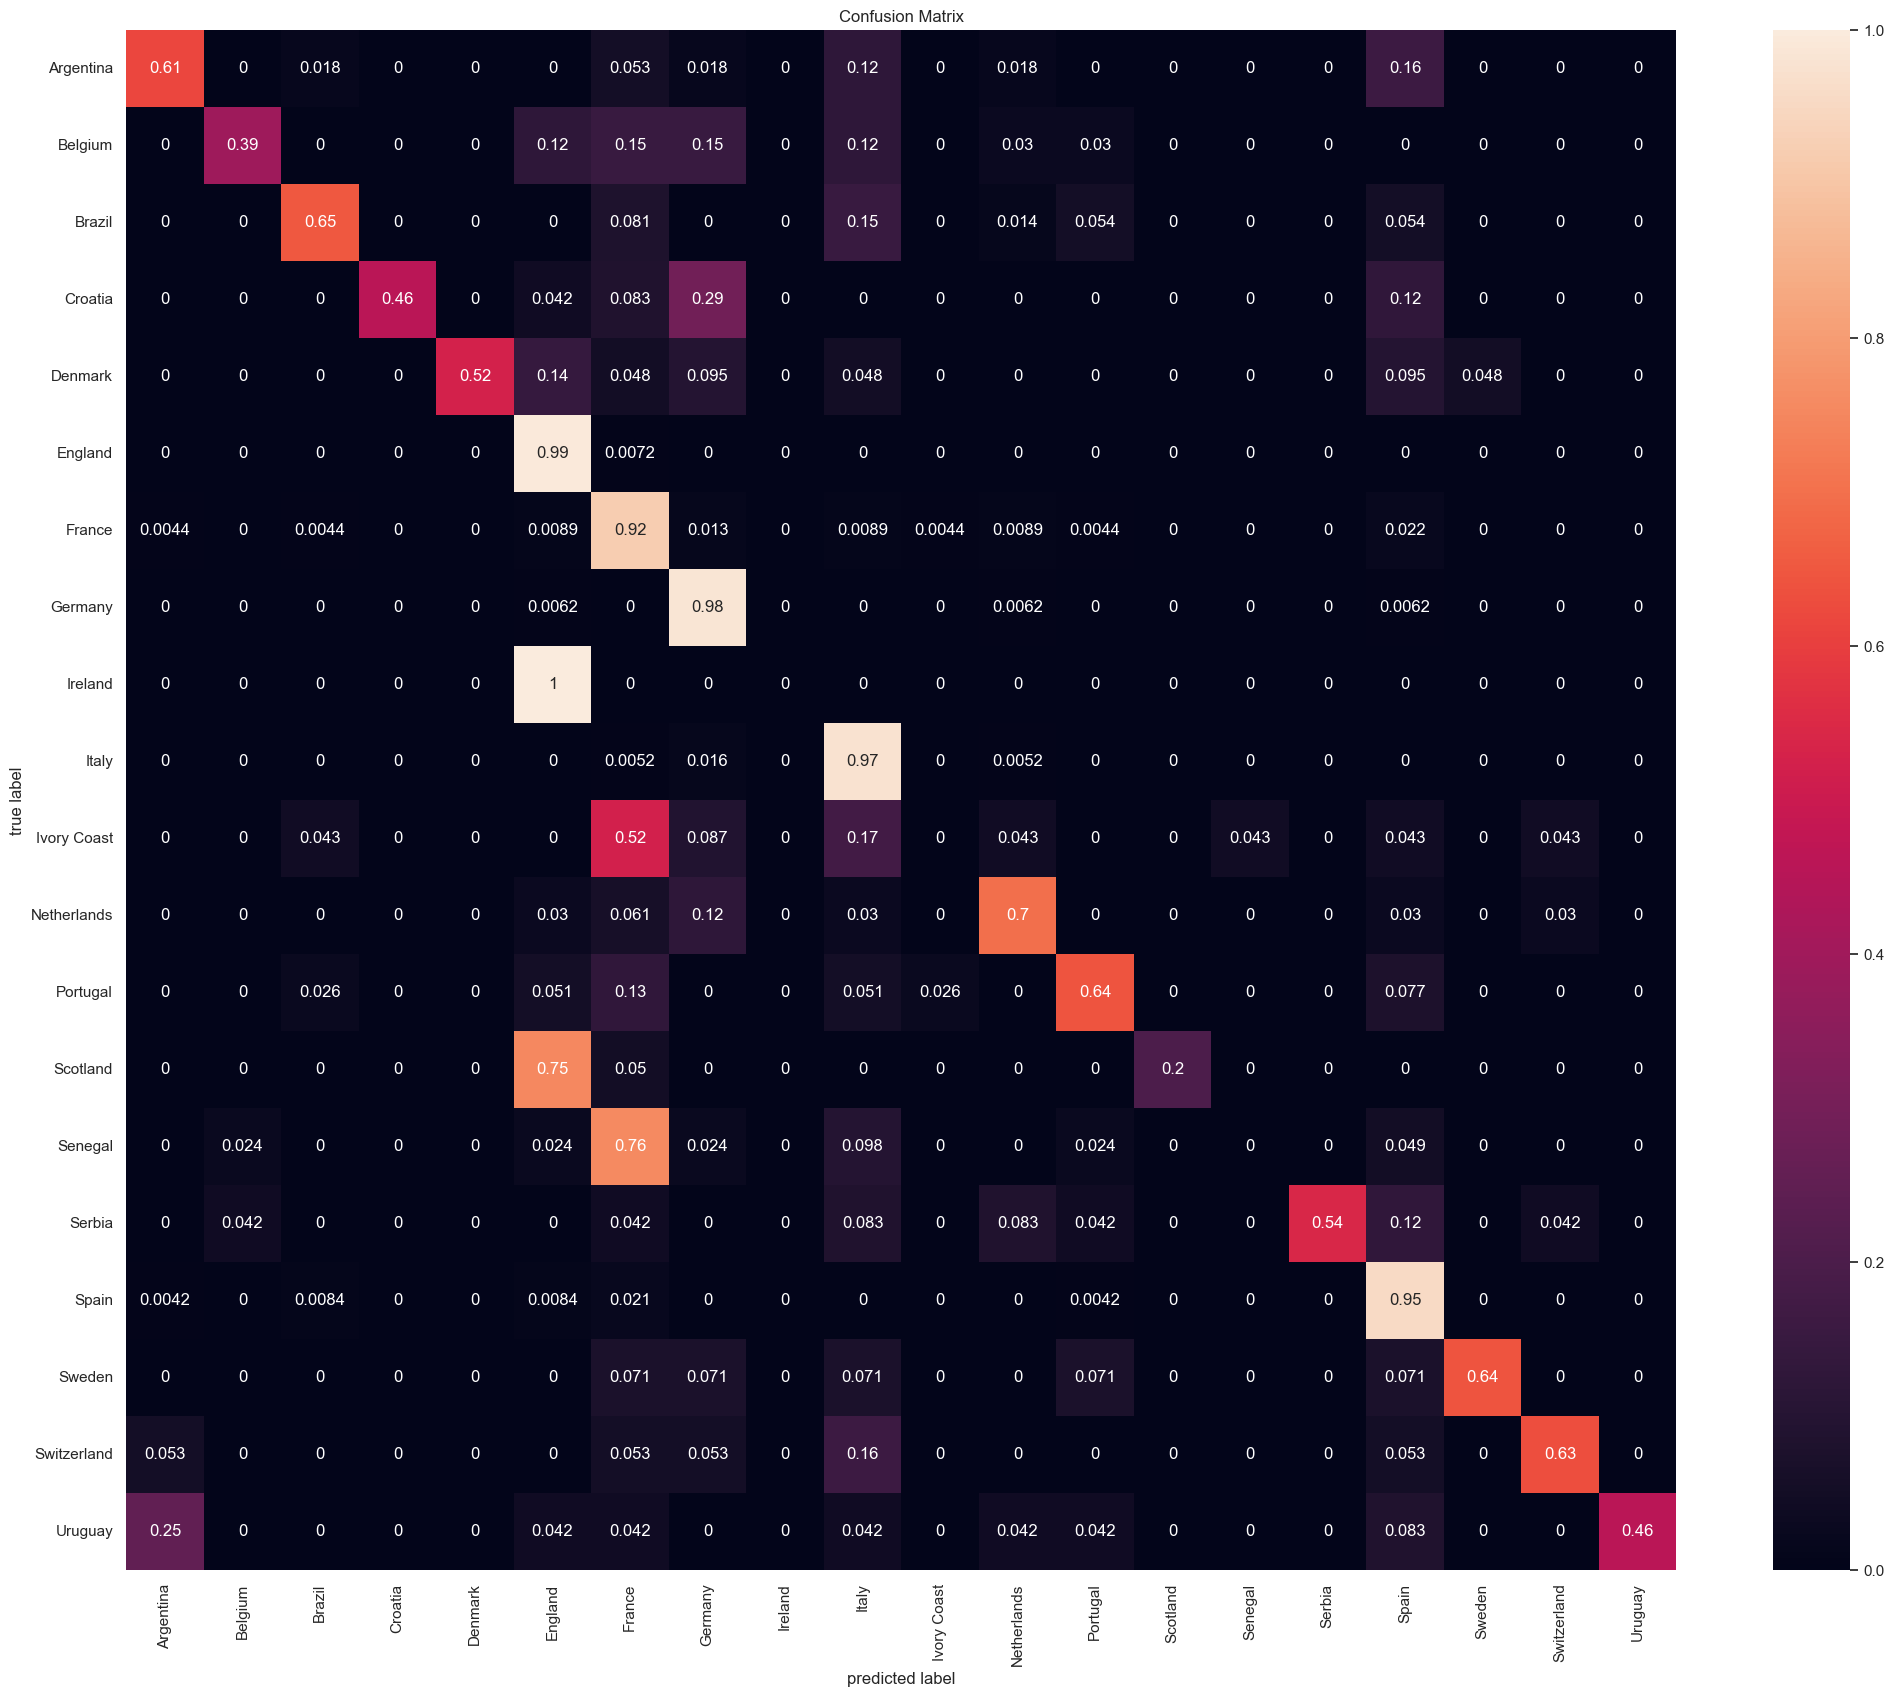

In [190]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,20)})
sns.heatmap(cfmat, 
            xticklabels=dtree.classes_,
            yticklabels=dtree.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')

# Edges
## Similar process to prepare the data

In [77]:
import pandas as pd
df1 = pd.read_csv("EdgesDirty.csv")


C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\3188492230.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("EdgesDirty.csv")


In [79]:
df1['LeagueCountry'] = df1['LeagueCountry'].str.split(' ').str[1]
df1["Comp"] = df1["League"] + [" "] + df1["LeagueCountry"]

In [80]:
df1['Squad'] = df1['Squad'] + [","] + df1["Comp"]
df1

,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2,Comp
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56,1. La Liga ESP
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6,1. La Liga ESP
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb,1. La Liga ESP
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6,1. La Liga ESP
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1,1. La Liga ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1,1. Bundesliga GER
901967,Michael-Zetterer,Amos-Pieper,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc,1. Bundesliga GER
901968,Michael-Zetterer,Romano-Schmid,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e,1. Bundesliga GER
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21,1. Bundesliga GER


In [81]:
l = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']


borb = []
for row in df1['Comp']:
    if row in l:
        borb.append(1)
    else:
        borb.append(0)


In [82]:
df1['Big 5'] = borb

In [83]:
df100 = df1.loc[df1['Big 5'] == 1]
df100

,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,Born2,MP1,MP2,Goals1,Goals2,Node1,Node2,Comp,Big 5
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1975,1,35,0.0,1.0,30f729b3,29863c56,1. La Liga ESP,1
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1983,1,9,0.0,0.0,30f729b3,2ebb9df6,1. La Liga ESP,1
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1984,1,17,0.0,2.0,30f729b3,05e805eb,1. La Liga ESP,1
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Spain,1989,1984,1,6,0.0,0.0,30f729b3,242e09b6,1. La Liga ESP,1
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14th,ESP,Spain,Uruguay,1989,1986,1,30,0.0,8.0,30f729b3,220c11f1,1. La Liga ESP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,Bulgaria,1995,2000,1,8,0.0,0.0,9b688ae1,1fc4f3d1,1. Bundesliga GER,1
901967,Michael-Zetterer,Amos-Pieper,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,Germany,1995,1998,1,8,0.0,0.0,9b688ae1,526ea7cc,1. Bundesliga GER,1
901968,Michael-Zetterer,Romano-Schmid,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,Austria,1995,2000,1,8,0.0,0.0,9b688ae1,220ace7e,1. Bundesliga GER,1
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5th,GER,Germany,England,1995,2001,1,7,0.0,1.0,9b688ae1,45e95f21,1. Bundesliga GER,1


In [84]:
for (i, row) in df100.iterrows():
    # df1.at[i,'Age1'] = df1.at[i,'Season'][:4]
    firstSes = int(df1.at[i, 'Season'][:4])
    # df1000.at[i, 'Age1'] = firstSes - int(df1000.at[i, 'Born1'])
    # df1000.at[i, 'Age2'] = firstSes - int(df1000.at[i, 'Born2'])
    if(df100.at[i, 'Born1'] == "na Na"):
        print(df100.at[i, 'Name1'])
        df100.at[i, 'Born1'] = 1990
    if(df100.at[i, 'Born2'] == "na Na"):
        print(df100.at[i, 'Name2'])
        df100.at[i, 'Born2'] = 1990

    df100.at[i, 'Age1'] = firstSes- int(df100.at[i, 'Born1'])
    df100.at[i, 'Age2'] = firstSes- int(df100.at[i, 'Born2'])

C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\1617096754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100.at[i, 'Age1'] = firstSes- int(df100.at[i, 'Born1'])
C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\1617096754.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100.at[i, 'Age2'] = firstSes- int(df100.at[i, 'Born2'])


Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu
Ionut-Andrei-Radu


In [85]:
df100['LeagueRank'] = df100['LeagueRank'].fillna('20th')
df100['LeagueRank'] = df1['LeagueRank'].map(lambda x: str(x)[:-2])
# df100['LeagueRank'] = df100['LeagueRank'].astype(int)
type(df100['LeagueRank'][0])
df100

C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\3859202001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['LeagueRank'] = df100['LeagueRank'].fillna('20th')
C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\3859202001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['LeagueRank'] = df1['LeagueRank'].map(lambda x: str(x)[:-2])


,Name1,Name2,Season,Squad,League,LeagueRank,LeagueCountry,Nation1,Nation2,Born1,...,MP1,MP2,Goals1,Goals2,Node1,Node2,Comp,Big 5,Age1,Age2
0,Sergio-Abad-Beyxer,Sergio-Ballesteros,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14,ESP,Spain,Spain,1989,...,1,35,0.0,1.0,30f729b3,29863c56,1. La Liga ESP,1,21.0,35.0
1,Sergio-Abad-Beyxer,David-Cerrajeria,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14,ESP,Spain,Spain,1989,...,1,9,0.0,0.0,30f729b3,2ebb9df6,1. La Liga ESP,1,21.0,27.0
2,Sergio-Abad-Beyxer,Rafa-Jorda,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14,ESP,Spain,Spain,1989,...,1,17,0.0,2.0,30f729b3,05e805eb,1. La Liga ESP,1,21.0,26.0
3,Sergio-Abad-Beyxer,Gorka-Larrea,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14,ESP,Spain,Spain,1989,...,1,6,0.0,0.0,30f729b3,242e09b6,1. La Liga ESP,1,21.0,26.0
4,Sergio-Abad-Beyxer,Cristhian-Stuani,2010-2011,"Levante,1. La Liga ESP",1. La Liga,14,ESP,Spain,Uruguay,1989,...,1,30,0.0,8.0,30f729b3,220c11f1,1. La Liga ESP,1,21.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901966,Michael-Zetterer,Ilia-Gruev,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5,GER,Germany,Bulgaria,1995,...,1,8,0.0,0.0,9b688ae1,1fc4f3d1,1. Bundesliga GER,1,27.0,22.0
901967,Michael-Zetterer,Amos-Pieper,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5,GER,Germany,Germany,1995,...,1,8,0.0,0.0,9b688ae1,526ea7cc,1. Bundesliga GER,1,27.0,24.0
901968,Michael-Zetterer,Romano-Schmid,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5,GER,Germany,Austria,1995,...,1,8,0.0,0.0,9b688ae1,220ace7e,1. Bundesliga GER,1,27.0,22.0
901969,Michael-Zetterer,Lee-Buchanan,2022-2023,"Werder Bremen,1. Bundesliga GER",1. Bundesliga,5,GER,Germany,England,1995,...,1,7,0.0,1.0,9b688ae1,45e95f21,1. Bundesliga GER,1,27.0,21.0


### Convert string values to numeric

In [88]:
df1

#Use this df, create soem flags or assign some sort of data like in the anti money laundering paper to our edges/nodes. From this use a decision tree to predict this field.
#Or another field using this created filed, nation, squad, league rank, etc...
#Could tell us how random connections are in our network and how predicitable the football network is

leauges = df100["League"]
nations = df100["Nation1"].tolist()
nations2 = df100["Nation2"].tolist()
seasy = df100["Season"]
club = df100["Squad"]

natty = nations + nations2

clubUnique = club.unique()
leaugesUnique = leauges.unique()
seasonUnqique = seasy.unique()
nationsUnique = set(natty)


leauges = pd.DataFrame(leaugesUnique)
natty = pd.DataFrame(nationsUnique)
seasy = pd.DataFrame(seasonUnqique)
club = pd.DataFrame(clubUnique)

leauges.rename(columns={0 : 'League'}, inplace=True)
natty.rename(columns={0 : 'Country'}, inplace=True)
seasy.rename(columns={0 : 'Season'}, inplace=True)
club.rename(columns={0 : 'Squad'}, inplace = True)

for (i, row) in leauges.iterrows():
    leauges.at[i,'MapValue'] = int(i)
for (i, row) in natty.iterrows():
    natty.at[i, 'MapValue'] = int (i)
for (i, row) in seasy.iterrows():
    seasy.at[i, 'MapValue'] = int (i)
for (i, row) in club.iterrows():
    club.at[i, 'MapValue'] = int (i)
club

,Squad,MapValue
0,"Levante,1. La Liga ESP",0.0
1,"Empoli,1. Serie A ITA",1.0
2,"Torino,1. Serie A ITA",2.0
3,"Milan,1. Serie A ITA",3.0
4,"Atlético Madrid,1. La Liga ESP",4.0
...,...,...
210,"Como,1. Serie A ITA",210.0
211,"Internazionale,1. Serie A ITA",211.0
212,"Coventry City,1. Premier League ENG",212.0
213,"Cremonese,1. Serie A ITA",213.0


In [89]:
d = pd.Series(seasy.MapValue.values,index=seasy.Season).to_dict()
d1 = pd.Series(natty.MapValue.values, index=natty.Country).to_dict()
d2 = pd.Series(leauges.MapValue.values, index=leauges.League).to_dict()
d3 = pd.Series(club.MapValue.values, index=club.Squad).to_dict()

df100['SeasonNum'] = df100['Season'].map(d)
df100['CountryNum1'] = df100['Nation1'].map(d1)
df100['CountryNum2'] = df100['Nation2'].map(d1)
df100['LeagueNum'] = df100['League'].map(d2)
df100["SquadNum"] = df100['Squad'].map(d3)

C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\1083462904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['SeasonNum'] = df100['Season'].map(d)
C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\1083462904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['CountryNum1'] = df100['Nation1'].map(d1)
C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\1083462904.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [91]:
df100[df100['LeagueRank'] == ''] = 20

C:\Users\Owen\AppData\Local\Temp\ipykernel_15616\750787377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100[df100['LeagueRank'] == ''] = 20


In [193]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import train_test_split

import io
import networkx as nx
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import deg
%matplotlib inline
%pip install sklearn
%pip install -U scikit-learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as pl

#0.99
# features = ['LeagueRank','Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2', 'LeagueNum']


#0.95
# features = ['LeagueRank','Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2']

#0.56
features = ['LeagueRank','Age1', 'Age2', 'CountryNum1', 'CountryNum2']

# 0.18
#features = ['Age1', 'Age2', 'CountryNum1', 'CountryNum2']

#0.19
# features = ['LeagueRank', 'SeasonNum']


#0.55
# features = ['Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2', 'LeagueNum']


#0.4
# features = ['Age1', 'Age2', 'SeasonNum', 'CountryNum1', 'CountryNum2']


X = df100[features]
y = df100['SquadNum']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [93]:
y_pred = dtree.predict(X_test)
y_pred

array([ 90.,  32., 213., ...,  14., 189.,  47.])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
results = []
resultdf = pd.DataFrame()
asc = []
per = []
recall = []
f1 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    dtree = DecisionTreeClassifier()
    dtree = dtree.fit(X_train, y_train)

    y_pred = dtree.predict(X_test)
    y_pred

    yp = pd.DataFrame(y_pred)
    X_test['labels'] = y_pred
    X_test['Actual'] = y_test
    # # X_test = X_test.astype({'Actual':'int'})
    # # X_test = X_test.astype({'labels':'int'})
    # print(X_test.dtypes)
    X_test['Actual'] = X_test['Actual'].map(d3_inv)
    X_test['labels'] = X_test['labels'].map(d3_inv)
    X_test[X_test['labels'] == X_test['Actual']]

    print(accuracy_score(X_test['Actual'], X_test['labels']))
    # results.append(accuracy_score(X_test['Actual'], X_test['labels']))
    asc.append(accuracy_score(X_test['Actual'], X_test['labels']))
    per.append(precision_score(X_test['Actual'], X_test['labels'], average='weighted'))
    recall.append(recall_score(X_test['Actual'], X_test['labels'], average='weighted'))
    f1.append(f1_score(X_test['Actual'], X_test['labels'], average='weighted'))
    report = classification_report(X_test['Actual'], X_test['labels'], output_dict=True)
    dfresult = pd.DataFrame(report).transpose()
    dfresult = dfresult[:-3]
    # print(dfresult)
    frames = [resultdf, dfresult]
    resultdf = pd.concat(frames)
    # print(resultdf)


In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dtree.predict(X_test)
y_pred

dfPreds = df100

d3_inv = {v: k for k, v in d3.items()}

 
yp = pd.DataFrame(y_pred)
X_test['labels'] = y_pred
X_test['Actual'] = y_test
# # X_test = X_test.astype({'Actual':'int'})
# # X_test = X_test.astype({'labels':'int'})
# print(X_test.dtypes)
X_test['Actual'] = X_test['Actual'].map(d3_inv)
X_test['labels'] = X_test['labels'].map(d3_inv)
X_test[X_test['labels'] == X_test['Actual']]

print(accuracy_score(X_test['Actual'], X_test['labels']))
X_test

0.5642008926413483


,LeagueRank,Age1,Age2,CountryNum1,CountryNum2,labels,Actual
458203,20,25.0,19.0,103.0,103.0,"Bordeaux,1. Ligue 1 FRA","Nantes,1. Ligue 1 FRA"
261704,17,33.0,19.0,25.0,137.0,"Genoa,1. Serie A ITA","Genoa,1. Serie A ITA"
665626,19,37.0,25.0,25.0,25.0,"Cremonese,1. Serie A ITA","Crotone,1. Serie A ITA"
575300,6,28.0,17.0,134.0,86.0,"Manchester Utd,1. Premier League ENG","Manchester Utd,1. Premier League ENG"
838678,14,19.0,20.0,70.0,70.0,"Hannover 96,1. Bundesliga GER","Mainz 05,1. Bundesliga GER"
...,...,...,...,...,...,...,...
464914,3,30.0,24.0,76.0,134.0,"Tottenham,1. Premier League ENG","Tottenham,1. Premier League ENG"
141232,4,25.0,34.0,134.0,103.0,"Tottenham,1. Premier League ENG","Tottenham,1. Premier League ENG"
253878,7,24.0,27.0,52.0,70.0,"Hamburger SV,1. Bundesliga GER","Hamburger SV,1. Bundesliga GER"
169828,4,27.0,24.0,80.0,103.0,"RB Leipzig,1. Bundesliga GER","Toulouse,1. Ligue 1 FRA"


In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(X_test['Actual'], X_test['labels']))
print(classification_report(X_test['Actual'], X_test['labels']))
report = classification_report(X_test['Actual'], X_test['labels'], output_dict=True)

[[  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   0 221 ...   2   0   0]
 ...
 [  0   0   0 ... 362   0   0]
 [  0   0   0 ...   0   2   1]
 [  0   0   0 ...   0   0 151]]


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Rec

                                       precision    recall  f1-score   support

        1860 Munich,1. Bundesliga GER       0.00      0.00      0.00         3
          AA Aachen,1. Bundesliga GER       1.00      0.50      0.67         2
               Ajaccio,1. Ligue 1 FRA       0.66      0.64      0.65       345
                Alavés,1. La Liga ESP       0.49      0.49      0.49       552
              Albacete,1. La Liga ESP       0.00      0.00      0.00         7
               Almería,1. La Liga ESP       0.43      0.45      0.44       397
                Amiens,1. Ligue 1 FRA       0.55      0.46      0.50       258
                Angers,1. Ligue 1 FRA       0.55      0.51      0.53       688
         Arles-Avignon,1. Ligue 1 FRA       0.50      0.64      0.56       122
            Arminia,1. Bundesliga GER       0.59      0.56      0.57       167
        Arsenal,1. Premier League ENG       0.57      0.55      0.56      1405
                Ascoli,1. Serie A ITA       0.31   

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Rec

In [104]:
dfresult = pd.DataFrame(report).transpose()
dfresult = dfresult[:-3]
dfresult = dfresult.loc[dfresult['support'] > 50]
dfresult

,precision,recall,f1-score,support
"Ajaccio,1. Ligue 1 FRA",0.663664,0.640580,0.651917,345.0
"Alavés,1. La Liga ESP",0.485560,0.487319,0.486438,552.0
"Almería,1. La Liga ESP",0.425178,0.450882,0.437653,397.0
"Amiens,1. Ligue 1 FRA",0.546296,0.457364,0.497890,258.0
"Angers,1. Ligue 1 FRA",0.551020,0.510174,0.529811,688.0
...,...,...,...,...
"West Ham,1. Premier League ENG",0.590272,0.576026,0.583062,1243.0
"Wigan Athletic,1. Premier League ENG",0.551867,0.485401,0.516505,274.0
"Wolfsburg,1. Bundesliga GER",0.581166,0.535095,0.557180,1211.0
"Wolves,1. Premier League ENG",0.664220,0.619863,0.641275,584.0


In [138]:
dfresult = resultdf
# dfresult = dfresult.loc[dfresult['support'] > 50]

In [139]:

dfresult['squadcomp'] = dfresult.index.get_level_values(0)

In [140]:
dfresult.sort_values(by=['precision'], ascending=False)[0:20]


,precision,recall,f1-score,support,squadcomp
"Modena,1. Serie A ITA",1.0,1.000000,1.000000,1.0,"Modena,1. Serie A ITA"
"Coventry City,1. Premier League ENG",1.0,1.000000,1.000000,1.0,"Coventry City,1. Premier League ENG"
"Perugia,1. Serie A ITA",1.0,0.214286,0.352941,14.0,"Perugia,1. Serie A ITA"
"AA Aachen,1. Bundesliga GER",1.0,0.250000,0.400000,4.0,"AA Aachen,1. Bundesliga GER"
"Derby County,1. Premier League ENG",1.0,0.500000,0.666667,2.0,"Derby County,1. Premier League ENG"
"Messina,1. Serie A ITA",1.0,0.090909,0.166667,11.0,"Messina,1. Serie A ITA"
"Modena,1. Serie A ITA",1.0,0.500000,0.666667,4.0,"Modena,1. Serie A ITA"
"Ipswich Town,1. Premier League ENG",1.0,0.500000,0.666667,2.0,"Ipswich Town,1. Premier League ENG"
"Coventry City,1. Premier League ENG",1.0,0.500000,0.666667,2.0,"Coventry City,1. Premier League ENG"
"AA Aachen,1. Bundesliga GER",1.0,0.500000,0.666667,2.0,"AA Aachen,1. Bundesliga GER"


In [141]:
dfresult[['Team','Comp']] = dfresult['squadcomp'].str.split(',', expand=True)
dfresult

,precision,recall,f1-score,support,squadcomp,Team,Comp
"1860 Munich,1. Bundesliga GER",0.000000,0.000000,0.000000,0.0,"1860 Munich,1. Bundesliga GER",1860 Munich,1. Bundesliga GER
"AA Aachen,1. Bundesliga GER",0.000000,0.000000,0.000000,3.0,"AA Aachen,1. Bundesliga GER",AA Aachen,1. Bundesliga GER
"Ajaccio,1. Ligue 1 FRA",0.667870,0.608553,0.636833,304.0,"Ajaccio,1. Ligue 1 FRA",Ajaccio,1. Ligue 1 FRA
"Alavés,1. La Liga ESP",0.496078,0.479167,0.487476,528.0,"Alavés,1. La Liga ESP",Alavés,1. La Liga ESP
"Albacete,1. La Liga ESP",0.000000,0.000000,0.000000,7.0,"Albacete,1. La Liga ESP",Albacete,1. La Liga ESP
...,...,...,...,...,...,...,...
"Wigan Athletic,1. Premier League ENG",0.613043,0.514599,0.559524,274.0,"Wigan Athletic,1. Premier League ENG",Wigan Athletic,1. Premier League ENG
"Wolfsburg,1. Bundesliga GER",0.589140,0.524577,0.554987,1241.0,"Wolfsburg,1. Bundesliga GER",Wolfsburg,1. Bundesliga GER
"Wolves,1. Premier League ENG",0.634146,0.588997,0.610738,618.0,"Wolves,1. Premier League ENG",Wolves,1. Premier League ENG
"Xerez,1. La Liga ESP",0.200000,0.083333,0.117647,12.0,"Xerez,1. La Liga ESP",Xerez,1. La Liga ESP


In [142]:
scatdf = dfresult.groupby('Team').agg({
   'precision' : 'mean',
   'recall' : 'mean',
   'f1-score': 'mean',
   'support' : 'mean',
   'Comp' : 'first'  
}).reset_index()

scatdf

,Team,precision,recall,f1-score,support,Comp
0,1860 Munich,0.261249,0.153450,0.166958,2.816327,1. Bundesliga GER
1,AA Aachen,0.274561,0.219649,0.220551,2.042105,1. Bundesliga GER
2,Ajaccio,0.656724,0.601070,0.627245,331.050000,1. Ligue 1 FRA
3,Alavés,0.504784,0.470728,0.486789,553.120000,1. La Liga ESP
4,Albacete,0.000000,0.000000,0.000000,4.868687,1. La Liga ESP
...,...,...,...,...,...,...
210,Wigan Athletic,0.554351,0.517514,0.534634,268.790000,1. Premier League ENG
211,Wolfsburg,0.586098,0.538775,0.561308,1231.030000,1. Bundesliga GER
212,Wolves,0.628350,0.613783,0.620716,579.330000,1. Premier League ENG
213,Xerez,0.344051,0.191309,0.233469,10.440000,1. La Liga ESP


In [195]:
import numpy as np
print(f' Accuracy Mean is {np.mean(asc)} with SD of {np.std(asc)}')
print(f' Percision Mean is {np.mean(per)} with SD of {np.std(per)}')
print(f' Recall Mean is {np.mean(recall)} with SD of {np.std(recall)}')
print(f' F1 Mean is {np.mean(f1)} with SD of {np.std(f1)}')

 Accuracy Mean is 0.5647965776710762 with SD of 0.0016149265654151364
 Percision Mean is 0.5673448847928753 with SD of 0.0016503025717550018
 Recall Mean is 0.5647965776710762 with SD of 0.0016149265654151364
 F1 Mean is 0.5648618908315876 with SD of 0.0016135698067366348


In [144]:
scatdf = scatdf.loc[scatdf['support'] > 50]
dfresult = dfresult.loc[dfresult['support'] > 50]

<AxesSubplot:xlabel='precision', ylabel='recall'>

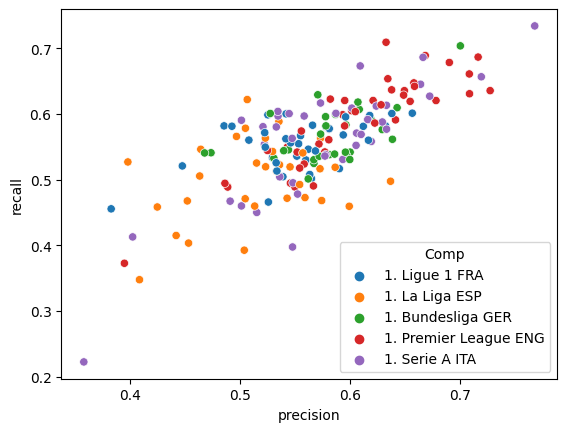

In [145]:
colors = {'1. Premier League ENG': 'red',
        '1. Bundesliga GER': 'brown',
        '1. La Liga ESP' : 'orange',
        '1. Ligue 1 FRA' : 'blue',
        '1. Serie A ITA' : 'green'
        }
sns.scatterplot(data=scatdf, x="precision", y="recall", hue='Comp')

<AxesSubplot:xlabel='f1-score', ylabel='Comp'>

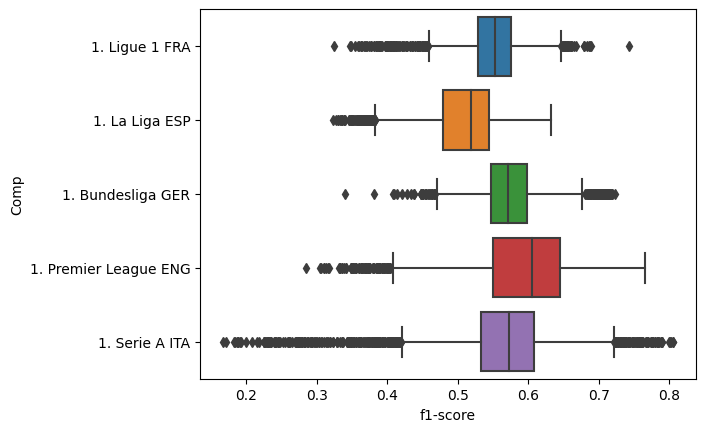

In [146]:
import seaborn as sns
sns.boxplot(data=dfresult, x="f1-score", y="Comp")

In [113]:
dfresult.to_csv('clustering.csv', index=False)